<a href="https://colab.research.google.com/github/ClarisseAlvarenga/alura_experimentos/blob/master/Experimentos_Alura_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à análise de experimentos**



## **Importando as bibliotecas**

In [1]:
#Pandas
import pandas as pd
#Numpy
import numpy as np


## **Ensaios realizados na forma normalizada**



<img width='800px' src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_2.png?raw=true">

Construindo uma matriz representando todos os ensaios realizados

In [ ]:
#usando o numpy
ensaios = np.array([-1,-1], [1,-1], [-1,1], [1,1])

pyDOE2


https://pypi.org/project/pyDOE2/

In [ ]:
!pip install pyDOE2

In [4]:
import pyDOE2 as doe

Criando um planejamento fatorial de $2^2$ usando o pyDOE2

In [5]:
#2 level full factorial design
ensaios = doe.ff2n(2)

In [6]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

Inserindo o planejamento num DataFrame

In [8]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [9]:
experimento['Porcoes'] = [19,37,24,49]

In [10]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


## **Analisando graficamente o experimento**

In [11]:
#usando o Seaborn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
#escolhendo a paleta de cores e o estilo do gráfico
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')
# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')


**Para a farinha**

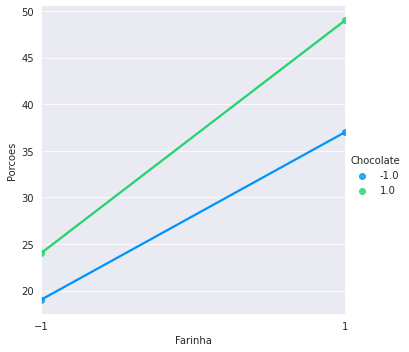

In [22]:
ax1 = sns.lmplot(data= experimento, x='Farinha', y='Porcoes', ci=None, hue='Chocolate')
#ci = intervalo de confiança
#hue divide a linha em duas de acordo com o Chocolate, para verificar o efeito da interação com a farinha
#definindo um parâmetro para excluir os valores intermediários
ax1.set(xticks = (-1,1));

**Para o chocolate**

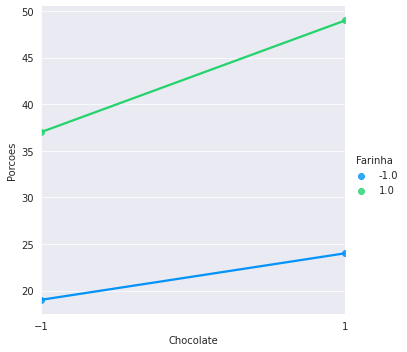

In [25]:
#valores separados em dois grupos pela variável Farinha
ax2 = sns.lmplot(data= experimento, x='Chocolate', y='Porcoes', ci=None, hue='Farinha')
ax2.set(xticks = (-1,1));

**Visualizando os dois gráficos em conjunto**

In [52]:
#função copiada do stackoverflow - https://stackoverflow.com/questions/33049884/how-to-plot-2-seaborn-lmplots-side-by-side
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

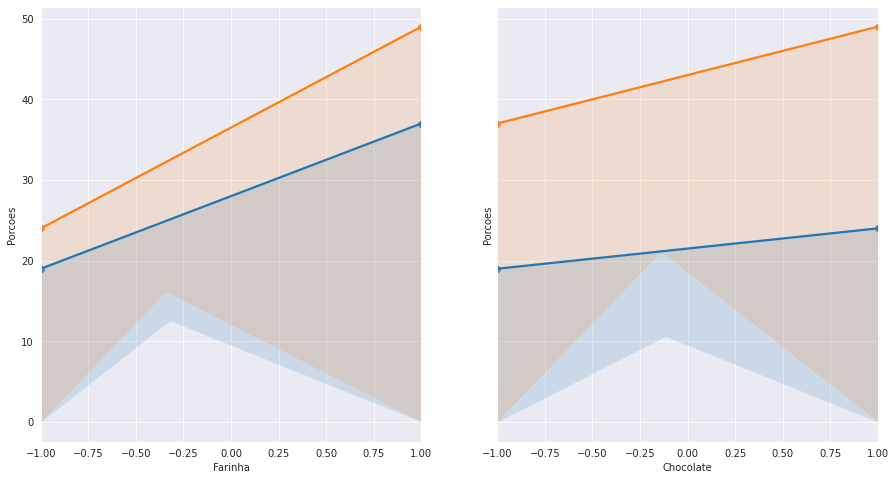

In [61]:
# Visualizando lado a lado Two subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
#passando os parâmetros dos nossos gráficos para a função
hue_regplot(data= experimento, x='Chocolate', y='Porcoes',hue='Farinha', ax=ax2)
hue_regplot(data=experimento, x='Farinha', y='Porcoes', hue='Chocolate', ax=ax1)
plt.show()

## **Análise Estatística**

<img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_3.png?raw=true">

### **Ajustando o modelo estatístico**

In [63]:
#usando o statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
#formula: buscamos as porções, pela Farinha, Chocolate e a interação Farinha Chocolate (o intercepto é gerado pela função) - a fórmula parece muito com a sintaxe de modelos do R
modelo = smf.ols(data=experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [65]:
#ajustando os parâmetros do modelo
modelo_ajustado = modelo.fit()

In [67]:
#vendo os resultados que o método de ajuste encontrou
print(modelo_ajustado.summary())
#intercept é a média da quantidade de porções nos experimentos realizados

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                nan
Time:                        01:48:31   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


### **Análise de significância estatística**